**Test search_by_geomery function for matedata service**

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import * 
from shapely.ops import transform

In [3]:
metajson = "1538.geojson"
data = gpd.read_file(metajson)
data.set_index("UID",inplace=True,drop=False)

In [21]:
# input geometry from the google map interface
# http://gf2.ucs.indiana.edu/quaketables/uavsar?view=map
point_str = 'Point: (33.94697109585554, -118.07714843749999)'
rect_str = 'Rectangle: ((33.343343561567, -118.69238281249999), (34.34703015733175, -117.04443359374999))'
line_str = 'Line: ((34.72713264415401, -119.37353515624999),(33.67311969894201, -117.76953124999999),(33.983418330994276, -116.20947265624999),(32.4021911686893, -116.91259765624999))'
poly_str = 'Polygon: ((34.05626592724434, -117.59374999999999),(33.572488142047554, -118.38476562499999),(32.837100401791204, -117.25317382812499),(33.4809029903106, -116.73681640624999))'

# input sample from geogateway
#/geogateway_django_app/UAVSAR_geom/?type=point&queryStr=(32.65788,-115.48470)
#/geogateway_django_app/UAVSAR_geom/?type=rectangle&queryStr=((32.491,-117.300),(32.797,-116.883))
    

In [8]:
line_str.replace(":","").split()[0]

'Line'

In [37]:
# shapely: Point, LineString, Polygon
# code converted from uavsarapi.py -- uavsar_query
def str2geometry(gstr):
    """convert a str input to geometry"""
    
    gtype,gcoord = gstr.split(":")
    gtype = gtype.strip()
    gcoord = eval(gcoord)
    if gtype == "Point":
        lat,lon = gcoord
        geom = Point(lon,lat)
    elif gtype == "Line":
        lonlat = [(x[1],x[0]) for x in gcoord]
        geom = LineString(lonlat)
    elif gtype == "Polygon":
        lonlat = [(x[1],x[0]) for x in gcoord]
        geom = Polygon(lonlat)
    elif gtype == "Rectangle":
        lat0,lon0 = gcoord[0]
        lat1,lon1 = gcoord[1]
        lonlat = [(lon0,lat1), (lon0,lat0), (lon1,lat0), (lon1,lat1)]
        geom = Polygon(lonlat)
    else:
        geom = None

    return geom
    

<AxesSubplot:>

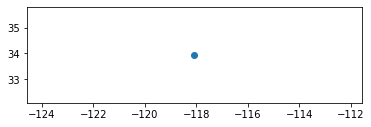

In [51]:
s=gpd.GeoSeries(str2geometry(point_str))
s.plot()

<AxesSubplot:>

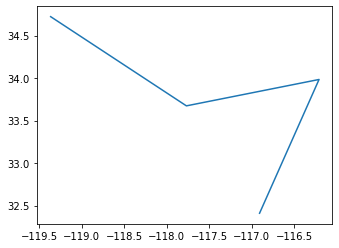

In [52]:
s=gpd.GeoSeries(str2geometry(line_str))
s.plot()        

<AxesSubplot:>

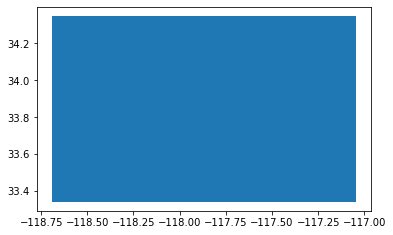

In [53]:
s = gpd.GeoSeries(str2geometry(rect_str))
s.plot()

<AxesSubplot:>

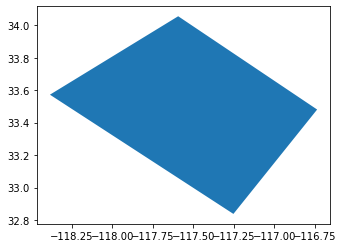

In [54]:
s = gpd.GeoSeries(str2geometry(poly_str))
s.plot()